This notebook looks at comparing the CDF's and determining how well the laplacian fit for the random systems performs on the resonant distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import time
from scipy.stats import laplace, norm, ks_2samp
from scipy.optimize import curve_fit
#from scipy.stats import norm

%matplotlib inline

This is for the random systems, output its list of sigmas

In [2]:
#pull up gaussian fits, and the P value significance, to take all systems with above 1-e6.
#this is a reasonable threshold because higher than that removes many systems, and lower than that includes many odd systems

random_distribution_parameters = pd.read_csv("../Figures/MCMCFigures/ProbabilityTable_Fixed_Covariences_266.csv")
significances = pd.read_csv("../csvs/significance_scores.csv")

good_fits = significances[significances["KS_P"]>1e-6]
valid_gaus_params = random_distribution_parameters[ random_distribution_parameters["ID"].isin(good_fits["ID"]) ]
print(valid_gaus_params.shape)
print(valid_gaus_params["Sigma"].max())
print(valid_gaus_params["Sigma"].values)

(189, 8)
1.078939098463822
[0.46151888 0.33015733 0.38712247 0.43121741 0.3668993  0.42505205
 0.41166663 0.45503812 0.67231015 0.32214622 0.6449042  0.8622681
 0.35742141 0.23681775 0.9155178  0.35165693 0.35011032 0.3796505
 0.62845752 0.52566243 0.42331347 0.15445875 0.30808857 0.49512725
 0.5313544  0.46172148 0.52775346 0.32171409 0.38977113 0.61608462
 0.49257999 0.46202806 0.48582747 0.43687545 0.86357803 0.46589641
 0.40960749 0.37858134 0.36352759 0.46619523 0.49503706 0.4566153
 0.31495032 0.46233931 0.3865212  0.32275829 0.4685723  0.39736274
 0.36960433 0.4815207  0.32439069 0.38021166 0.2184015  0.28973225
 0.54520962 0.33288155 0.32191856 0.43078825 0.35375352 0.48178119
 0.46254918 0.46374164 0.72350204 0.38036609 0.52431156 0.35087489
 0.38259536 0.62045785 0.25132004 0.3675336  0.40811828 0.26720517
 0.36036495 0.5565069  0.62530469 0.39406892 0.38802977 0.33966745
 0.48889066 0.79001466 0.52743976 0.73114414 0.60289589 0.5154032
 0.50730723 0.66683195 0.68445213 0.336

This is for the resonant data set

In [3]:
resonant_distribution_parameters= pd.read_csv("../csvs/Res_3_feats/Convolved_Params_239_IOU.csv")
significances = pd.read_csv("../csvs/Res_3_feats/res_signficance_scores.csv")
resonant_distribution_parameters["Sigma"] = np.abs(resonant_distribution_parameters["Sigma"])

good_fits = significances[significances["KS_P"]>1e-6]
valid_res_gaus_params = resonant_distribution_parameters[ resonant_distribution_parameters["ID"].isin(good_fits["ID"]) ]
print(valid_res_gaus_params.shape)
print(valid_res_gaus_params["Sigma"].min())

(171, 7)
0.045522005114765965


In [5]:
ks_2samp(valid_gaus_params["Sigma"].values, valid_res_gaus_params["Sigma"].values)

Ks_2sampResult(statistic=0.4193817878028404, pvalue=1.5944118166273993e-14)

Since the p value is very low, the two distributions can be said to be very different
Can we show the cumulative distribution plot?

189
1.078939098463822


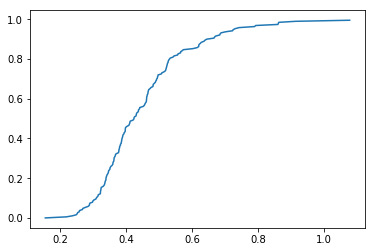

In [6]:
ordered_random_distribution = np.sort(valid_gaus_params["Sigma"].values)

N = ordered_random_distribution.shape[0]
print N
X2 = ordered_random_distribution
print X2[-1]
F2 = np.array(range(N))/float(N)
plt.plot(X2, F2)
plt.show()

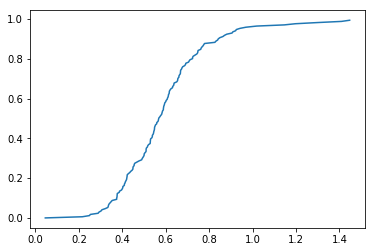

In [7]:
ordered_resonant_distribution = np.sort(valid_res_gaus_params["Sigma"].values)

N = ordered_resonant_distribution.shape[0]
X2 = ordered_resonant_distribution
F2 = np.array(range(N))/float(N)
plt.plot(X2, F2)
plt.show()

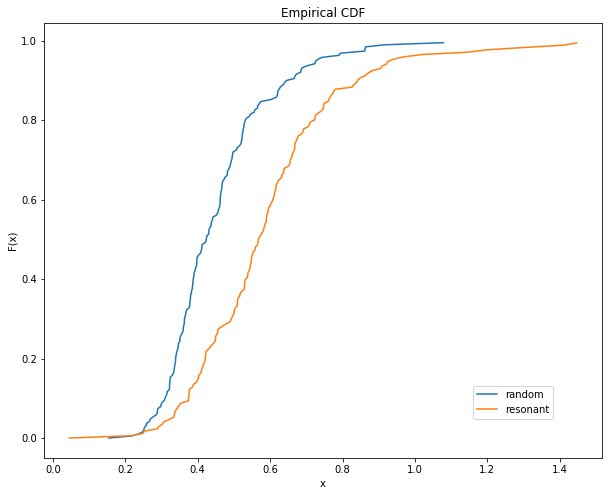

In [8]:
fig, ax = plt.subplots(figsize = (10,8))
#fig

ordered_random_distribution = np.sort(valid_gaus_params["Sigma"].values)

N = ordered_random_distribution.shape[0]
X2 = ordered_random_distribution
F2 = np.array(range(N))/float(N)
ax.plot(X2, F2, label="random")


ordered_resonant_distribution = np.sort(valid_res_gaus_params["Sigma"].values)

N = ordered_resonant_distribution.shape[0]
X2 = ordered_resonant_distribution
F2 = np.array(range(N))/float(N)
ax.plot(X2, F2, label="resonant")

# plt.show()
ax.set_title("Empirical CDF")
ax.set_ylabel("F(x)")
ax.set_xlabel("x")
fig.legend(loc=2, bbox_to_anchor=(0.65, 0.2))

Find the distribution where the sigma for the random sample is 3. That should be an interesting distribution.

In [14]:
def laplace_fit(data, mean, spread):
    #data is your data
    #mean spread are the params you try to fit to the data
    return np.exp(-np.abs(data-mean)/spread)/2./spread

In [25]:
valid_gaus_params["Sigma"].values.size

189

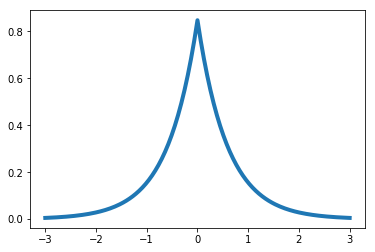

In [60]:
# resonant graph

# plot the laplace from the random system
# range from about 0 to 1.5 catches the sigmas
bins = np.linspace(-3,3, valid_gaus_params["Sigma"].values.size)

popt = [0.       , 0.5899713] # from Convolving Test notebook for random systems
# Need to pull the associated error from that calculation as well

# popt, pcov = curve_fit(laplace_fit, bins, valid_gaus_params["Sigma"].values)

# center the distribution

plt.plot(bins, laplace_fit(bins, *popt), label = "Laplace Fit", linewidth = 4)


In [61]:
# load the resonant time series dataset
res_test = pd.read_csv("../csvs/resonant_data.csv", index_col=0)
res_test.head()

,runstring,seed,pairindex,j,k,Zstar,libfac,Zcom,instability_time,shadow_instability_time
0,0000000.bin,3500000,1,12,1,0.021650,0.007181,0.041669,1.545872e+06,3.063700e+06
1,0000001.bin,700001,1,19,2,0.060291,0.523204,0.010656,9.990000e+08,9.990000e+08
2,0000002.bin,2,0,6,1,0.026353,0.012995,0.050319,9.990000e+08,9.990000e+08
3,0000003.bin,2100003,0,5,2,0.023511,0.713415,0.102200,2.287671e+06,8.392234e+06
4,0000004.bin,700004,0,12,1,0.017473,0.003612,0.039803,9.668931e+05,3.380350e+05


(5039, 10)


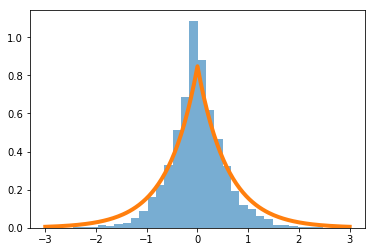

In [62]:
test_samples = res_test[ (np.log10(res_test["instability_time"])<7 ) &
                       (np.log10(res_test["shadow_instability_time"])<7 ) &
                       (np.log10(res_test["instability_time"])>4 ) &
                       (np.log10(res_test["shadow_instability_time"])>4 ) ]
print(test_samples.shape)

diff_data = np.log10(test_samples["instability_time"]) - np.log10(test_samples["shadow_instability_time"])
plt.hist(diff_data, bins= 30, normed=1, alpha = 0.6)
plt.plot(bins, laplace_fit(bins, *popt), label = "Laplace Fit", linewidth = 4)


In [64]:
# quantify how well the two fit: 
ks_2samp(laplace_fit(bins, *popt), diff_data)

Ks_2sampResult(statistic=0.5320500099226037, pvalue=4.524122839980425e-46)